In [1]:
pip install pyproj geopandas

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

In [65]:
crime = pd.read_csv("crime_preprocessed_rf")

In [66]:
crime

,OffenseMonth,OffenseDay,DOW,HourofDay,DaysAgo,OffenseDate,CENSUS_TRACT,LAT,LON,ExtractedMonth,ExtractedDay,UCRdesc_numeric,OffenseYear_numeric,TimeGroup_numeric,TimeBlock_numeric
0,5,31,6,22,9,2024-06-01 03:40:00,Census Tract 1175,41.556885,-81.568566,6,1,10,8,4,1
1,6,1,7,7,8,2024-06-01 12:00:00,Census Tract 1112.02,41.528059,-81.631364,6,1,4,8,4,2
2,5,31,6,21,9,2024-06-01 02:15:00,Census Tract 1186.02,41.514356,-81.619666,6,1,3,8,4,1
3,5,29,4,15,11,2024-05-29 20:41:00,Census Tract 1159,41.440774,-81.619782,5,29,3,8,4,0
4,5,28,3,6,12,2024-05-28 11:00:00,Census Tract 1984,41.489449,-81.647251,5,28,24,8,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635415,1,9,7,2,3074,2016-01-09 07:00:00,Census Tract 1013,41.480948,-81.764910,1,9,4,0,3,3
635416,1,10,1,15,3073,2016-01-10 20:41:00,Census Tract 1974,41.441018,-81.717836,1,10,3,0,3,0
635417,1,10,1,11,3073,2016-01-10 16:00:00,Census Tract 1984,41.494345,-81.646493,1,10,24,0,3,0
635418,1,7,5,15,3076,2016-01-07 20:10:00,Census Tract 1232,41.469973,-81.789100,1,7,24,0,3,0


In [67]:
violent_crime_list = [3, 10, 27, 21, 17, 20, 22, 15]
violent_crime = crime[crime['UCRdesc_numeric'].isin(violent_crime_list)]

In [58]:
import pandas as pd
import geopandas as gpd
from pyproj import Proj

# Define a UTM projection for Cleveland (Zone 17T is appropriate for Cleveland)
proj = Proj(proj="utm", zone=17, ellps="WGS84", datum="WGS84")

# Convert latitude and longitude to UTM (in meters)
violent_crime['UTM_x'], violent_crime['UTM_y'] = proj(violent_crime['LON'].values, violent_crime['LAT'].values)

# Define the size of the grid (1000 feet = 304.8 meters)
grid_size = 609.8  # in meters

# Create a function to assign each point to a grid cell
def assign_to_grid(x, y, grid_size):
    return (int(x // grid_size), int(y // grid_size))

# Apply the function to create grid cells for each crime event
violent_crime['Grid_Cell'] = violent_crime.apply(lambda row: assign_to_grid(row['UTM_x'], row['UTM_y'], grid_size), axis=1)

num_unique_tiles = violent_crime['Grid_Cell'].nunique()
print(num_unique_tiles)

C:\Users\singh\AppData\Local\Temp\ipykernel_21836\2349579457.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violent_crime['UTM_x'], violent_crime['UTM_y'] = proj(violent_crime['LON'].values, violent_crime['LAT'].values)
C:\Users\singh\AppData\Local\Temp\ipykernel_21836\2349579457.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violent_crime['UTM_x'], violent_crime['UTM_y'] = proj(violent_crime['LON'].values, violent_crime['LAT'].values)


586


C:\Users\singh\AppData\Local\Temp\ipykernel_21836\2349579457.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violent_crime['Grid_Cell'] = violent_crime.apply(lambda row: assign_to_grid(row['UTM_x'], row['UTM_y'], grid_size), axis=1)


In [68]:
violent_crime.columns

Index(['OffenseMonth', 'OffenseDay', 'DOW', 'HourofDay', 'DaysAgo',
       'OffenseDate', 'CENSUS_TRACT', 'LAT', 'LON', 'ExtractedMonth',
       'ExtractedDay', 'UCRdesc_numeric', 'OffenseYear_numeric',
       'TimeGroup_numeric', 'TimeBlock_numeric'],
      dtype='object')

In [69]:
violent_crime

,OffenseMonth,OffenseDay,DOW,HourofDay,DaysAgo,OffenseDate,CENSUS_TRACT,LAT,LON,ExtractedMonth,ExtractedDay,UCRdesc_numeric,OffenseYear_numeric,TimeGroup_numeric,TimeBlock_numeric
0,5,31,6,22,9,2024-06-01 03:40:00,Census Tract 1175,41.556885,-81.568566,6,1,10,8,4,1
2,5,31,6,21,9,2024-06-01 02:15:00,Census Tract 1186.02,41.514356,-81.619666,6,1,3,8,4,1
3,5,29,4,15,11,2024-05-29 20:41:00,Census Tract 1159,41.440774,-81.619782,5,29,3,8,4,0
11,5,19,1,14,21,2024-05-19 19:05:00,Census Tract 1186.02,41.517592,-81.619838,5,19,3,8,4,0
16,6,18,7,17,722,2022-06-18 22:23:00,Census Tract 1070,41.434211,-81.683311,6,18,3,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635407,1,16,7,7,3067,2016-01-16 12:06:00,Census Tract 1084,41.512440,-81.665739,1,16,3,0,3,2
635410,1,16,7,22,3067,2016-01-17 03:16:00,Census Tract 1163,41.541796,-81.604921,1,17,3,0,3,1
635411,1,15,6,11,3068,2016-01-15 16:30:00,Census Tract 1197.02,41.476286,-81.593394,1,15,3,0,3,0
635412,1,14,5,12,3069,2016-01-14 17:15:00,Census Tract 1176,41.582291,-81.549827,1,14,27,0,3,0


In [70]:
violent_crime['OffenseDate'] = pd.to_datetime(violent_crime['OffenseDate'], errors='coerce')
# Step 2: Set 'OffenseDate' as the index
violent_crime.set_index('OffenseDate', inplace=True)

C:\Users\singh\AppData\Local\Temp\ipykernel_21836\2518350400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  violent_crime['OffenseDate'] = pd.to_datetime(violent_crime['OffenseDate'], errors='coerce')


In [71]:
# Step 3: Now group by 'Grid_Cell' and resample using the 'OffenseDate' index
violent_crime_time_series = violent_crime.groupby(['CENSUS_TRACT', pd.Grouper(freq='W')]).agg({
    'DOW': 'first',  
    'HourofDay': 'first',  
    'DaysAgo': 'first',
    'ExtractedMonth': 'first',
    'ExtractedDay': 'first',
}).reset_index()

# Step 4: Create the 'Crime_Count' feature based on size (count of crimes)
violent_crime_time_series['Crime_Count_W'] = violent_crime.groupby(['CENSUS_TRACT', pd.Grouper(freq='W')]).size().values

# Now the 'violent_crime_time_series' contains the aggregated features and 'Crime_Count'
violent_crime_time_series

,CENSUS_TRACT,OffenseDate,DOW,HourofDay,DaysAgo,ExtractedMonth,ExtractedDay,Crime_Count_W
0,Census Tract 1011.01,2016-01-03,1,15,3080,1,3,1
1,Census Tract 1011.01,2016-01-10,5,5,3076,1,7,3
2,Census Tract 1011.01,2016-01-17,1,2,3066,1,17,2
3,Census Tract 1011.01,2016-01-24,3,0,3064,1,19,4
4,Census Tract 1011.01,2016-01-31,7,13,3053,1,30,2
...,...,...,...,...,...,...,...,...
59711,Census Tract 9809,2022-11-13,3,11,579,11,8,1
59712,Census Tract 9809,2022-12-18,5,15,542,12,15,2
59713,Census Tract 9809,2023-06-04,1,15,371,6,4,1
59714,Census Tract 9809,2023-09-17,4,15,270,9,13,1


In [72]:
violent_crime_multiple = violent_crime_time_series[violent_crime_time_series['Crime_Count_W']>5]
violent_crime_multiple

,CENSUS_TRACT,OffenseDate,DOW,HourofDay,DaysAgo,ExtractedMonth,ExtractedDay,Crime_Count_W
5,Census Tract 1011.01,2016-02-07,2,21,3051,2,2,6
25,Census Tract 1011.01,2016-07-17,3,1,2889,7,12,6
62,Census Tract 1011.01,2017-04-16,2,17,2617,4,10,6
66,Census Tract 1011.01,2017-05-14,4,18,2587,5,10,10
70,Census Tract 1011.01,2017-06-11,1,16,2555,6,11,7
...,...,...,...,...,...,...,...,...
59276,Census Tract 1992,2023-05-14,6,13,394,5,12,6
59282,Census Tract 1992,2023-06-25,5,11,353,6,22,10
59305,Census Tract 1992,2023-12-10,5,8,185,12,7,7
59321,Census Tract 1992,2024-04-14,2,7,62,4,8,8


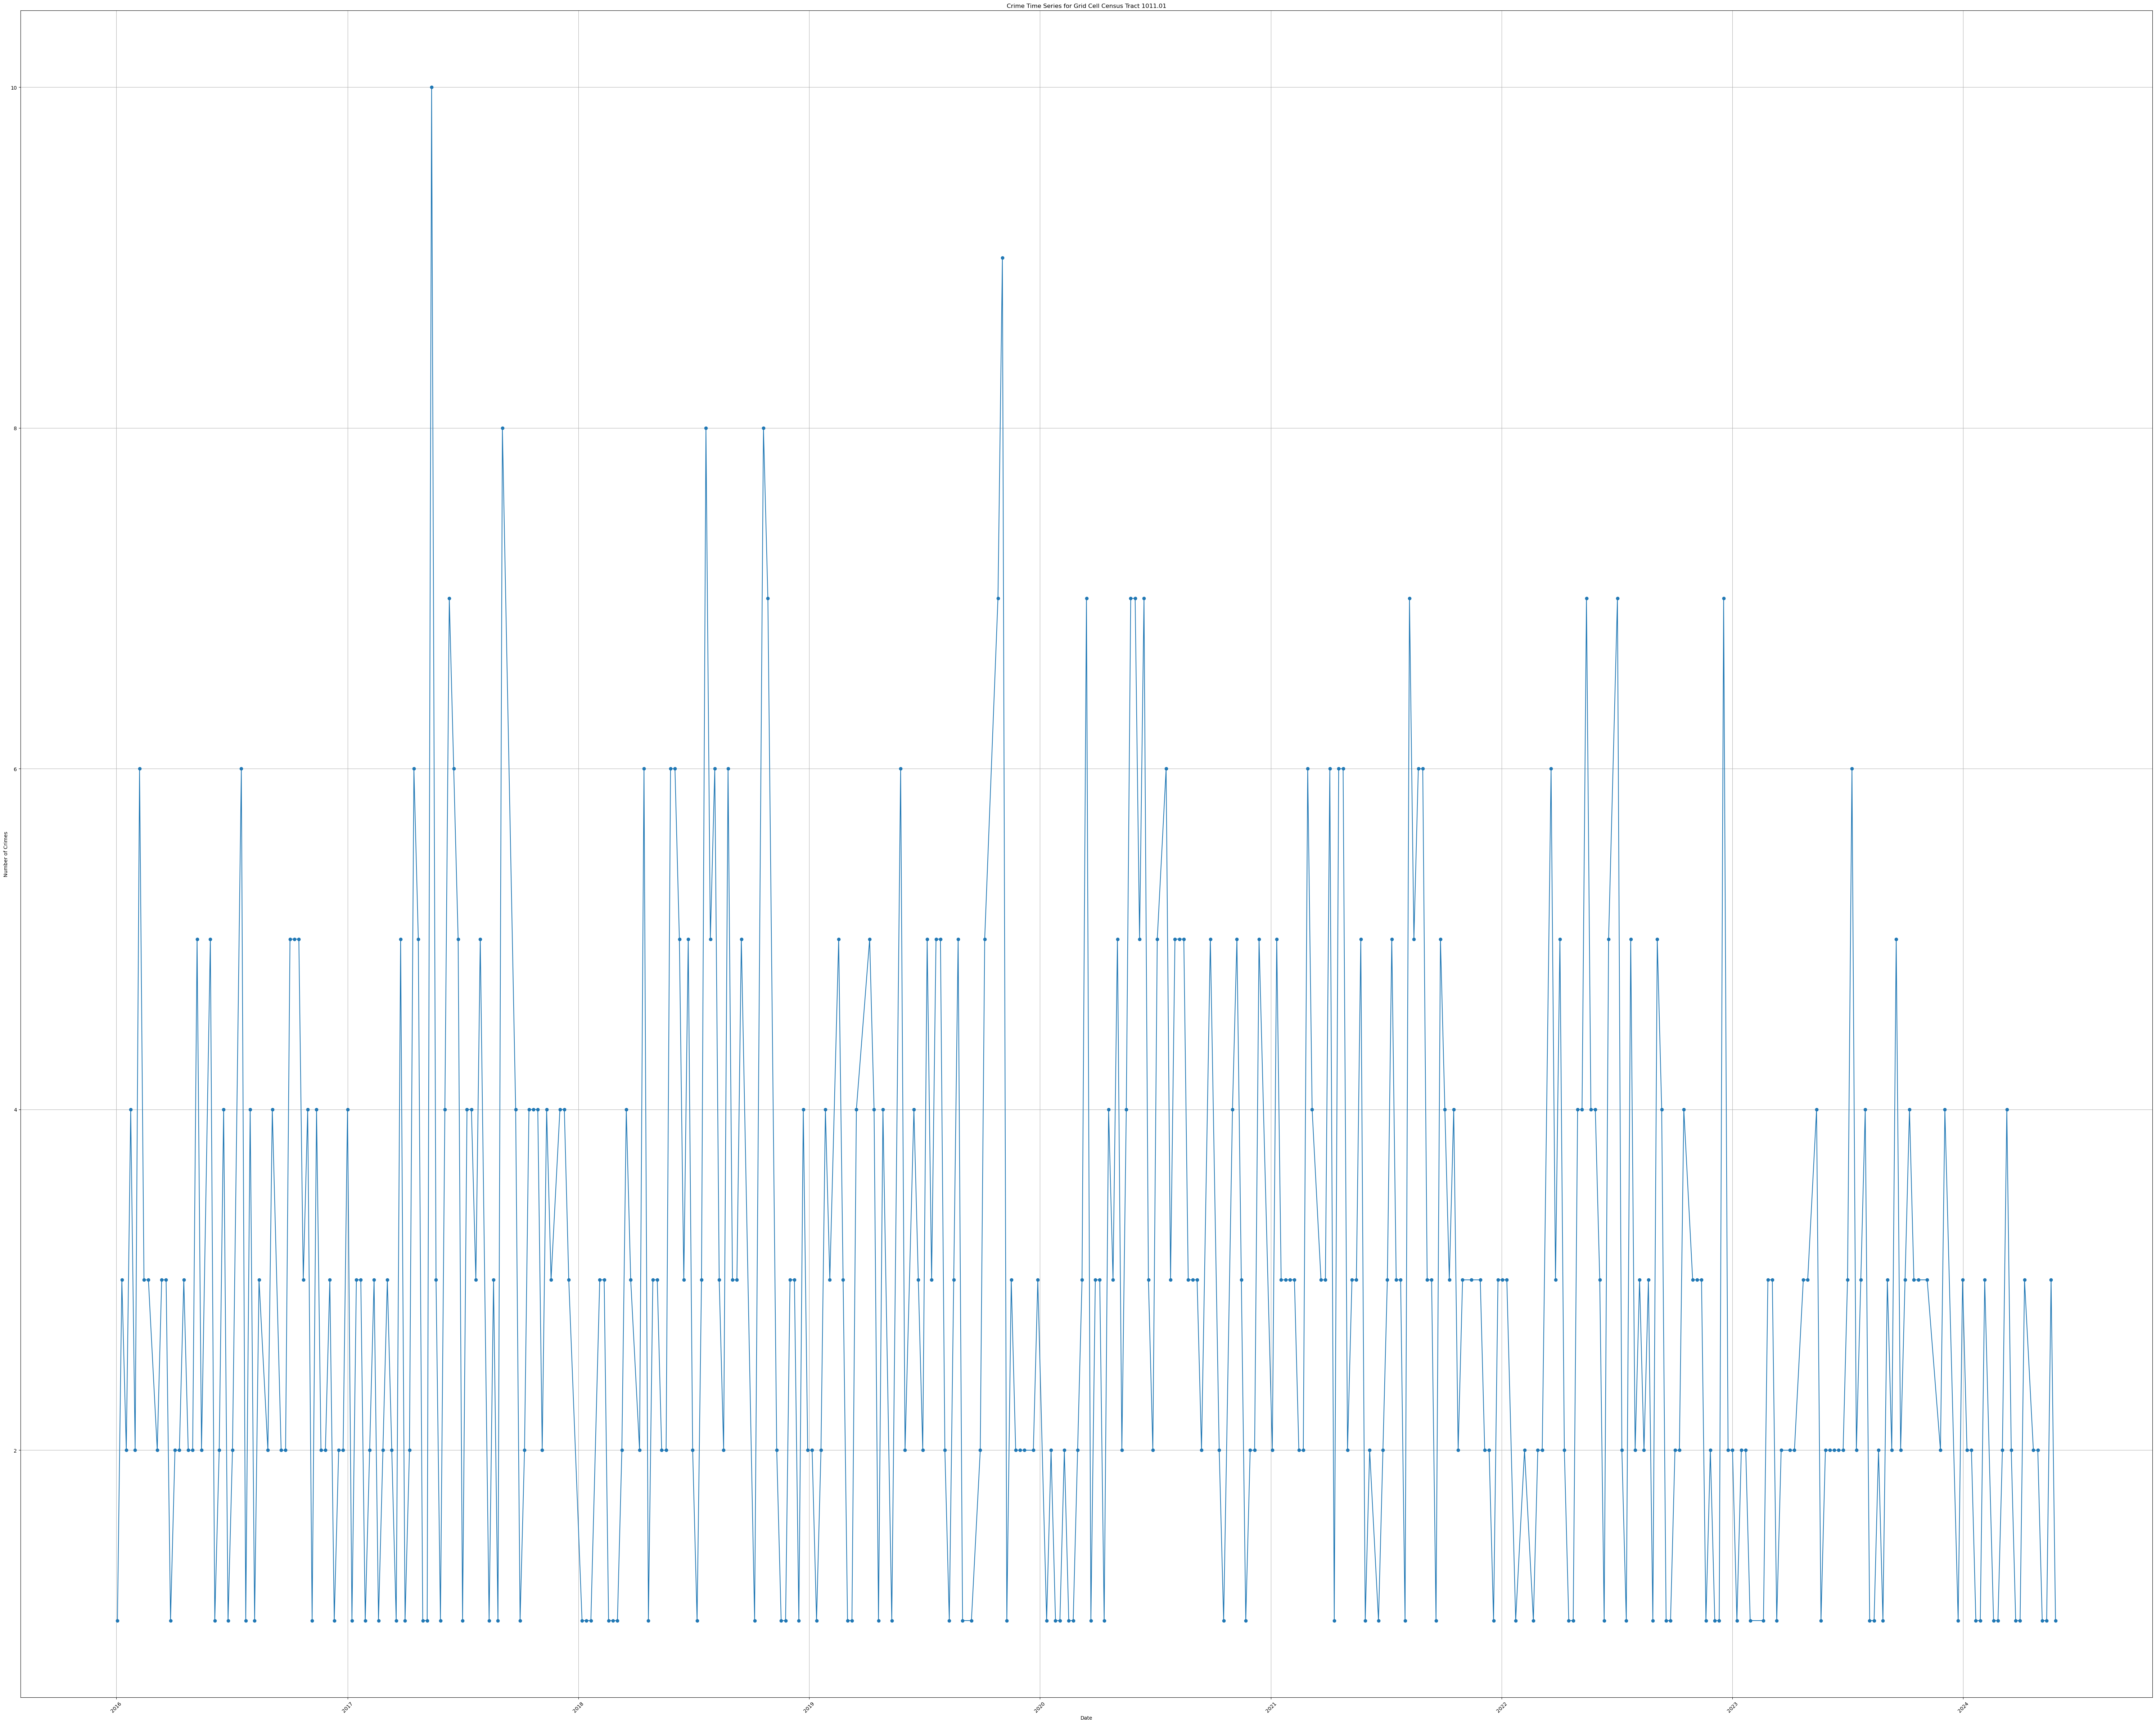

In [73]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Filter data for a specific grid cell, e.g., (x, y)
grid_cell = 'Census Tract 1011.01'
time_series_data = violent_crime_time_series[violent_crime_time_series['CENSUS_TRACT'] == grid_cell]

# Plot the time series for that grid cell
plt.figure(figsize=(60, 48))
plt.plot(time_series_data['OffenseDate'], time_series_data['Crime_Count_W'], marker='o')
plt.title(f'Crime Time Series for Grid Cell {grid_cell}')
plt.xlabel('Date')
plt.ylabel('Number of Crimes')

plt.xticks(rotation=45)

plt.grid(True)

plt.tight_layout()

plt.show()

In [21]:
violent_crime.shape[0]

635420

In [22]:
!pip install tqdm
!pip install xgboost
!pip install tensorflow

In [74]:
# feature encode grid_cells
from sklearn.preprocessing import LabelEncoder

violent_crime_time_series['CENSUS_TRACT'] = violent_crime_time_series['CENSUS_TRACT'].apply(lambda x: str(x))

le = LabelEncoder()
violent_crime_time_series['CENSUS_TRACT'] = le.fit_transform(violent_crime_time_series['CENSUS_TRACT'])

In [75]:
# Create a dictionary mapping of original 'Grid_Cell' values to their encoded labels
grid_cell_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Print the mappings
print("Grid_Cell to Encoded Label Mappings:")
for original, encoded in grid_cell_mapping.items():
    print(f"{original} -> {encoded}")

Grid_Cell to Encoded Label Mappings:
Census Tract 1011.01 -> 0
Census Tract 1011.02 -> 1
Census Tract 1012.01 -> 2
Census Tract 1013 -> 3
Census Tract 1014 -> 4
Census Tract 1015.01 -> 5
Census Tract 1016.03 -> 6
Census Tract 1017 -> 7
Census Tract 1018 -> 8
Census Tract 1019.01 -> 9
Census Tract 1021.01 -> 10
Census Tract 1021.02 -> 11
Census Tract 1022 -> 12
Census Tract 1023 -> 13
Census Tract 1024.01 -> 14
Census Tract 1024.02 -> 15
Census Tract 1027 -> 16
Census Tract 1028 -> 17
Census Tract 1029 -> 18
Census Tract 1033 -> 19
Census Tract 1035 -> 20
Census Tract 1036.02 -> 21
Census Tract 1038 -> 22
Census Tract 1044 -> 23
Census Tract 1048 -> 24
Census Tract 1051 -> 25
Census Tract 1053 -> 26
Census Tract 1054 -> 27
Census Tract 1055 -> 28
Census Tract 1056.02 -> 29
Census Tract 1057 -> 30
Census Tract 1059 -> 31
Census Tract 1061 -> 32
Census Tract 1062 -> 33
Census Tract 1065 -> 34
Census Tract 1066 -> 35
Census Tract 1068 -> 36
Census Tract 1069 -> 37
Census Tract 1070 -> 38
C

In [76]:
violent_crime_time_series.columns

Index(['CENSUS_TRACT', 'OffenseDate', 'DOW', 'HourofDay', 'DaysAgo',
       'ExtractedMonth', 'ExtractedDay', 'Crime_Count_W'],
      dtype='object')

In [77]:
from sklearn.model_selection import train_test_split

features = ['DOW', 'HourofDay', 'ExtractedMonth', 'ExtractedDay', 'CENSUS_TRACT']

X = violent_crime_time_series[features]
y = violent_crime_time_series['Crime_Count_W']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R² Score: {r2}')

          Feature  Importance
4    CENSUS_TRACT    0.297030
3    ExtractedDay    0.233128
1       HourofDay    0.204766
2  ExtractedMonth    0.140091
0             DOW    0.124985
Mean Absolute Error: 1.7343214086371321
Root Mean Squared Error: 2.2843880774142113
R² Score: 0.1549779201373893


C:\Users\singh\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Absolute Error: 1.6486837542787374
Root Mean Squared Error: 2.178616930093003
R² Score: 0.2314181923866272


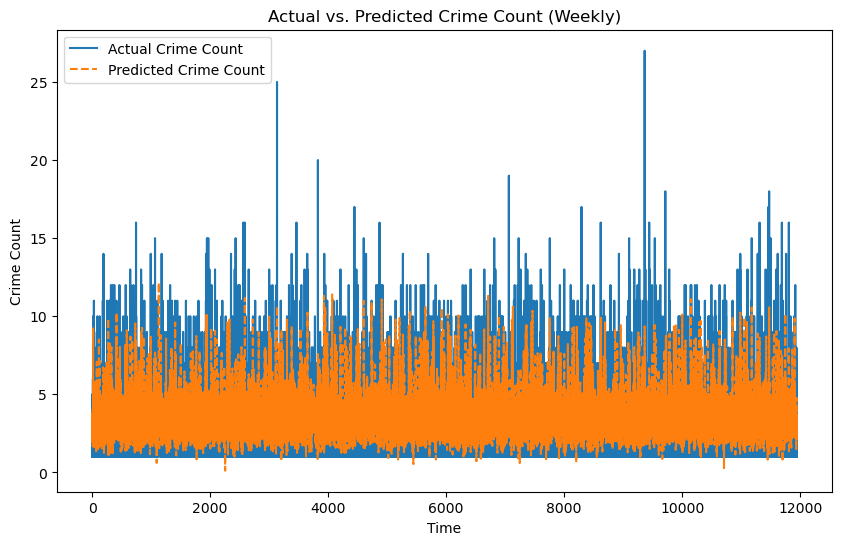

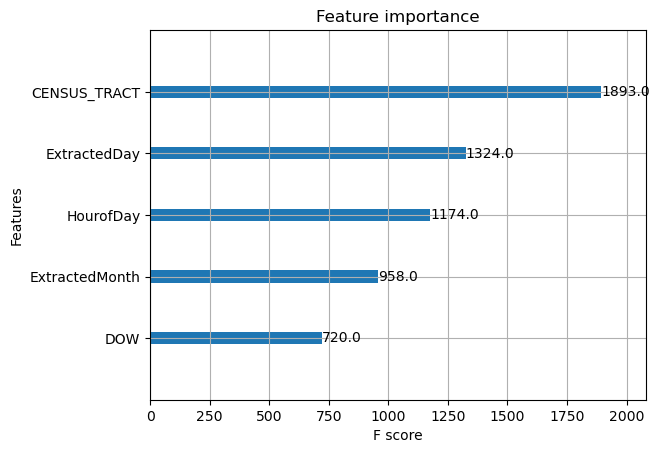

In [79]:
# XGBoost
import xgboost as xgb
from xgboost import XGBRegressor
import numpy as np

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Crime Count')
plt.plot(y_pred, label='Predicted Crime Count', linestyle='--')
plt.legend()
plt.title('Actual vs. Predicted Crime Count (Weekly)')
plt.xlabel('Time')
plt.ylabel('Crime Count')
plt.show()

xgb.plot_importance(xgb_model)
plt.show()

In [80]:
!pip install tensorflow-addons

   ---------------------------------------- 0.0/729.9 kB ? eta -:--:--
   ---------------------------------------- 729.9/729.9 kB 7.5 MB/s eta 0:00:00


In [84]:
X = violent_crime_time_series[features].values
y = violent_crime_time_series['Crime_Count_W'].values

X = X.reshape((X.shape[0], X.shape[1], 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, MultiHeadAttention, LayerNormalization, Dropout, Flatten

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Multi-Head Self-Attention
    attention = MultiHeadAttention(key_dim=head_size, num_heads=num_heads)(inputs, inputs)
    attention = Dropout(dropout)(attention)
    attention = LayerNormalization(epsilon=1e-6)(attention + inputs)
    
    # Feed Forward Network
    ff = Dense(ff_dim, activation="relu")(attention)
    ff = Dropout(dropout)(ff)
    ff = Dense(inputs.shape[-1])(ff)
    
    # Add & Normalize
    outputs = LayerNormalization(epsilon=1e-6)(ff + attention)
    return outputs

def build_transformer_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0, mlp_dropout=0):
    inputs = Input(shape=input_shape)
    
    # Add multiple Transformer blocks
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)
    
    # Flatten and add MLP
    x = Flatten()(x)
    for dim in mlp_units:
        x = Dense(dim, activation="relu")(x)
        x = Dropout(mlp_dropout)(x)
    
    # Output layer
    outputs = Dense(1)(x)
    
    return Model(inputs, outputs)

# Define model parameters
input_shape = (X_train.shape[1], X_train.shape[2])
model = build_transformer_model(
    input_shape=input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=256,
    num_transformer_blocks=4,
    mlp_units=[128],
    dropout=0.1,
    mlp_dropout=0.1,
)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Print the model summary
model.summary()

# Train the Transformer model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)    │ (None, 5, 1)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multi_head_attention          │ (None, 5, 1)              │           7,169 │ input_layer_4[0][0],       │
│ (MultiHeadAttention)          │                           │                 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 5, 1)              │               0 │ multi_head_attention[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add (Add)                     │ (None, 5, 1)              │               0 │ dropout_1[0][0],           │
│                               │                           │                 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ layer_normalization           │ (None, 5, 1)              │               2 │ add[0][0]                  │
│ (LayerNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_4 (Dense)               │ (None, 5, 256)            │             512 │ layer_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_2 (Dropout)           │ (None, 5, 256)            │               0 │ dense_4[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_5 (Dense)               │ (None, 5, 1)              │             257 │ dropout_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_1 (Add)                   │ (None, 5, 1)              │               0 │ dense_5[0][0],             │
│                               │                           │                 │ layer_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ layer_normalization_1         │ (None, 5, 1)              │               2 │ add_1[0][0]                │
│ (LayerNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multi_head_attention_1        │ (None, 5, 1)              │           7,169 │ layer_normalization_1[0][… │
│ (MultiHeadAttention)          │                           │                 │ layer_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_4 (Dropout)           │ (None, 5, 1)              │               0 │ multi_head_attention_1[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_2 (Add)                   │ (None, 5, 1)              │               0 │ dropout_4[0][0],           │
│                               │                           │                 │ layer_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ layer_normalization_2         │ (None, 5, 1)              │               

 Total params: 32,665 (127.60 KB)

 Trainable params: 32,665 (127.60 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4144/4144 - 305s - 74ms/step - loss: 16.0022 - val_loss: 10.9460
Epoch 2/50
4144/4144 - 307s - 74ms/step - loss: 10.8036 - val_loss: 10.4137
Epoch 3/50
4144/4144 - 305s - 74ms/step - loss: 10.7212 - val_loss: 10.4135
Epoch 4/50
4144/4144 - 304s - 73ms/step - loss: 10.7213 - val_loss: 10.4138
Epoch 5/50
4144/4144 - 307s - 74ms/step - loss: 10.7213 - val_loss: 10.4139
Epoch 6/50


KeyboardInterrupt: 

In [78]:
X = violent_crime_time_series[features].values
y = violent_crime_time_series['Crime_Count_W'].values
X = X.reshape((X.shape[0], X.shape[1], 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Print the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

C:\Users\singh\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4144/4144 - 22s - 5ms/step - loss: 13.5010 - val_loss: 10.0810
Epoch 2/50
4144/4144 - 20s - 5ms/step - loss: 10.4000 - val_loss: 10.0783
Epoch 3/50
4144/4144 - 21s - 5ms/step - loss: 10.3746 - val_loss: 10.0880
Epoch 4/50
4144/4144 - 19s - 5ms/step - loss: 10.3598 - val_loss: 10.1010
Epoch 5/50
4144/4144 - 19s - 5ms/step - loss: 10.3553 - val_loss: 10.0519
Epoch 6/50
4144/4144 - 19s - 5ms/step - loss: 10.3494 - val_loss: 10.0341
Epoch 7/50
4144/4144 - 27s - 7ms/step - loss: 10.3460 - val_loss: 10.0655
Epoch 8/50
4144/4144 - 25s - 6ms/step - loss: 10.3407 - val_loss: 10.0363
Epoch 9/50



KeyboardInterrupt

